<h1><center> Machine Learning for Young Data Scientist with Python </center><h1/>
<h3><center> "LINEAR REGRESSION" </center><h3/>


<img src="images/courses.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

# 1.1 Simple Linear Regression

In [2]:
# Initiate Random seed
rnds = np.random.RandomState(2018)

In [3]:
x = 10 * rnds.rand(50)

In [4]:
x

array([8.82349312, 1.04327738, 9.07009334, 3.06398899, 4.46408872,
       5.89985392, 8.37111099, 6.97800607, 8.02802838, 1.07215079,
       7.57092526, 9.99671013, 7.25930998, 1.4144824 , 3.56720596,
       9.4270411 , 6.10161887, 2.27577473, 6.68732371, 6.92904555,
       4.16862506, 1.71809559, 9.76890506, 3.30224143, 6.2904415 ,
       1.60610951, 0.89952645, 9.70822359, 8.16577574, 5.7136573 ,
       3.45853154, 4.03744004, 1.37383038, 9.00934491, 9.33936131,
       0.47377137, 6.71506884, 0.34831862, 2.5269136 , 5.57125054,
       5.25823477, 3.52967786, 0.92982969, 3.04508977, 8.62429861,
       7.16936538, 9.64071492, 5.39701864, 9.50539817, 6.67981561])

In [5]:
y = 2 * x - 5 + rnds.rand(50)

In [6]:
y

array([13.52122726, -2.43224032, 13.27758521,  1.81819951,  4.430296  ,
        6.87421891, 12.26573428,  9.87457987, 11.58348545, -2.49145056,
       11.07003682, 15.48611168,  9.75502698, -1.63961983,  2.29966726,
       14.2254692 ,  7.94548954, -0.21140997,  8.76661107,  8.91748084,
        3.44001906, -1.00655869, 15.35711243,  2.09429325,  8.48318997,
       -1.29773661, -3.19791122, 15.26010932, 11.8752402 ,  6.56600607,
        2.00279182,  3.47649217, -1.42536061, 13.82485237, 13.88826865,
       -3.75026936,  9.18359701, -4.17818043,  0.93616126,  7.07698845,
        5.65894153,  2.24885274, -2.73573838,  1.56412754, 12.34766517,
        9.81344311, 15.12612414,  6.58590987, 14.3698194 ,  9.10526731])

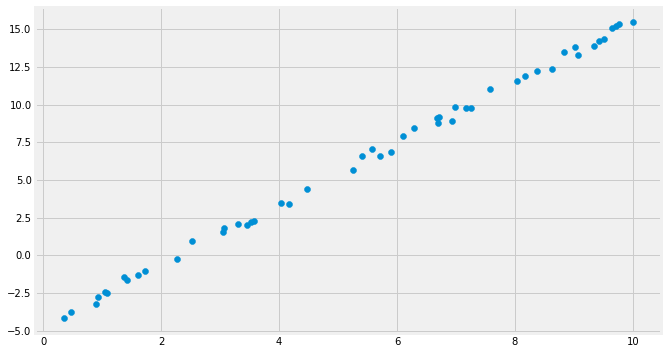

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression

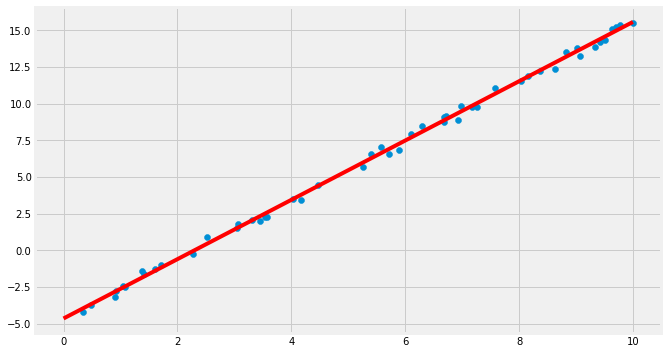

In [10]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis],y)

xfit = np.linspace(0,10,50)
yfit = model.predict(xfit[:,np.newaxis])


plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(xfit,yfit,'r')

In [11]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.021729252161195
Model intercept: -4.638351003082932


# 1.2 Load Data Boston From sklearn module and Exploration

In [12]:
from sklearn import datasets

In [13]:
dataset = datasets.load_boston() # เรียกใช้ dataset boston

In [14]:
X = dataset.data # นำตัวแปรต้นเก็บในตัวแปร X
y = dataset.target # นำตัวแปรต้นเก็บในตัวแปร Y

In [15]:
X.shape

(506, 13)

In [24]:
features = dataset.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
class_array = dataset.target
class_array[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [19]:
df_boston_features = pd.DataFrame(X,columns=features)

In [20]:
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df_boston_label = pd.DataFrame(y).rename(columns={0:'label'})

In [22]:
df_boston_label.head()

,label
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


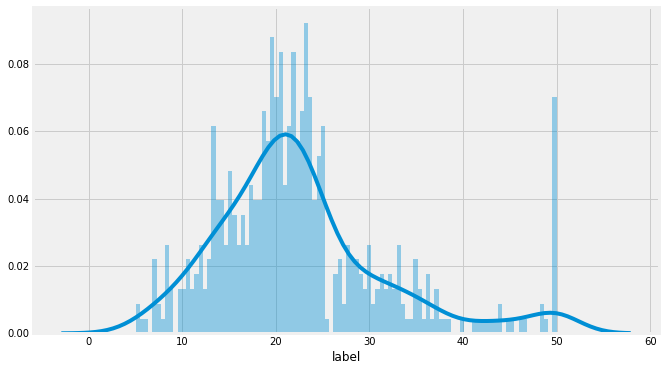

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df_boston_label['label'], bins=100)

# 1.3 Modeling and Evaluate Accuracy

In [27]:
reg = LinearRegression(fit_intercept=True)

In [28]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predicted = reg.predict(X)
predicted[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

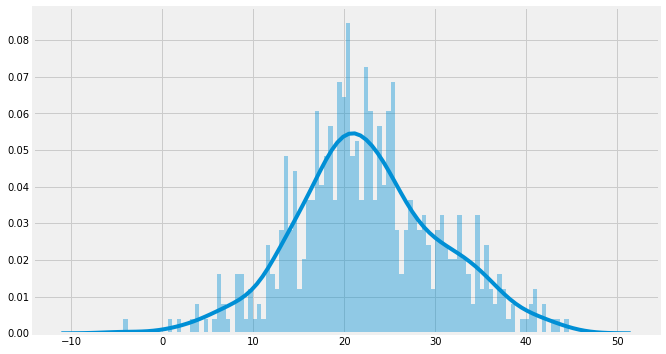

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(predicted, bins=100)

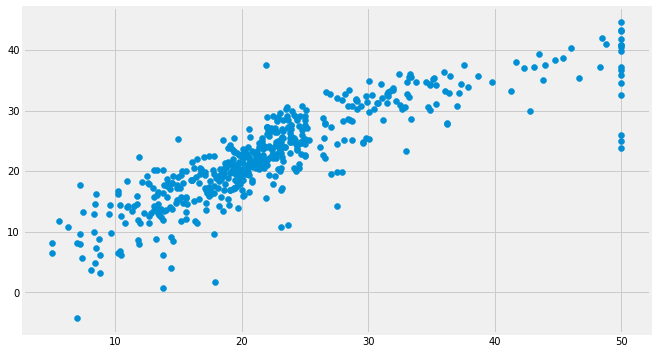

In [37]:
# Plot Y_true vs Y_predicted
plt.figure(figsize=(10,6))
plt.scatter(y,predicted)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
r2_score(y,predicted)

0.7406426641094095

In [46]:
mse = mean_squared_error(y,predicted)
mse

21.894831181729202

In [50]:
from math import sqrt

In [51]:
rmse = sqrt(mse)
rmse

4.679191295697281